# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
from __future__ import print_function

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength
from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = np.logspace(-6, -2.7, 40)
regularization_strengths = np.logspace(0.07, 3, 10)

results = {}
results_array = np.zeros((regularization_strengths.shape[0], learning_rates.shape[0]))
best_val = -1
best_svm = None

pass
################################################################################
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
import time
for lr in learning_rates:
    tic = time.time()
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs, num_iters=800)
        train_acc = np.mean(svm.predict(X_train_feats) == y_train)
        val_acc = np.mean(svm.predict(X_val_feats) == y_val)
        results[(lr, rs)] = (train_acc, val_acc)
        results_array[np.where(regularization_strengths == rs)[0], np.where(learning_rates == lr)[0]] = val_acc
        if best_val < val_acc:
            best_val = val_acc
            best_svm = svm
    toc = time.time()
    print("Finish %d/%d, time for this iter is %fs" % (np.where(learning_rates == lr)[0]+1, learning_rates.shape[0], toc-tic))

pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

Finish 1/40, time for this iter is 1.623850s
Finish 2/40, time for this iter is 1.844704s
Finish 3/40, time for this iter is 1.586061s
Finish 4/40, time for this iter is 1.572942s
Finish 5/40, time for this iter is 1.571983s
Finish 6/40, time for this iter is 1.848005s
Finish 7/40, time for this iter is 1.917604s
Finish 8/40, time for this iter is 1.585273s
Finish 9/40, time for this iter is 1.595722s
Finish 10/40, time for this iter is 2.121521s
Finish 11/40, time for this iter is 1.623318s
Finish 12/40, time for this iter is 1.573450s
Finish 13/40, time for this iter is 1.583868s
Finish 14/40, time for this iter is 1.661977s
Finish 15/40, time for this iter is 1.773067s
Finish 16/40, time for this iter is 1.603656s
Finish 17/40, time for this iter is 1.591702s
Finish 18/40, time for this iter is 1.619930s
Finish 19/40, time for this iter is 1.720771s
Finish 20/40, time for this iter is 1.574468s
Finish 21/40, time for this iter is 1.651468s
Finish 22/40, time for this iter is 1.68326

/home/laojk/Code/cs231n/fall2020_assignment1/assignment1/cs231n/classifiers/linear_svm.py:81: RuntimeWarning: overflow encountered in double_scalars
  loss = np.average(np.sum(score, axis=0)) + reg * np.sum(W * W)
/home/laojk/miniconda3/envs/cs231n/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/laojk/Code/cs231n/fall2020_assignment1/assignment1/cs231n/classifiers/linear_svm.py:81: RuntimeWarning: overflow encountered in multiply
  loss = np.average(np.sum(score, axis=0)) + reg * np.sum(W * W)


Finish 38/40, time for this iter is 1.811852s
Finish 39/40, time for this iter is 1.922259s
Finish 40/40, time for this iter is 1.786008s
lr 1.000000e-06 reg 1.174898e+00 train accuracy: 0.202408 val accuracy: 0.202000
lr 1.000000e-06 reg 2.486312e+00 train accuracy: 0.188408 val accuracy: 0.195000
lr 1.000000e-06 reg 5.261519e+00 train accuracy: 0.180694 val accuracy: 0.200000
lr 1.000000e-06 reg 1.113440e+01 train accuracy: 0.174143 val accuracy: 0.191000
lr 1.000000e-06 reg 2.356255e+01 train accuracy: 0.201327 val accuracy: 0.206000
lr 1.000000e-06 reg 4.986293e+01 train accuracy: 0.194857 val accuracy: 0.200000
lr 1.000000e-06 reg 1.055196e+02 train accuracy: 0.191571 val accuracy: 0.195000
lr 1.000000e-06 reg 2.233001e+02 train accuracy: 0.193510 val accuracy: 0.186000
lr 1.000000e-06 reg 4.725464e+02 train accuracy: 0.205469 val accuracy: 0.195000
lr 1.000000e-06 reg 1.000000e+03 train accuracy: 0.282551 val accuracy: 0.267000
lr 1.215109e-06 reg 1.174898e+00 train accuracy: 0.2

/home/laojk/miniconda3/envs/cs231n/lib/python3.7/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/laojk/Code/cs231n/fall2020_assignment1/assignment1/cs231n/classifiers/linear_svm.py:97: RuntimeWarning: overflow encountered in multiply
  dW = np.dot(weight, X).T / X.shape[0] + 2 * reg * W
/home/laojk/Code/cs231n/fall2020_assignment1/assignment1/cs231n/classifiers/linear_svm.py:76: RuntimeWarning: invalid value encountered in matmul
  score = (X @ W).T


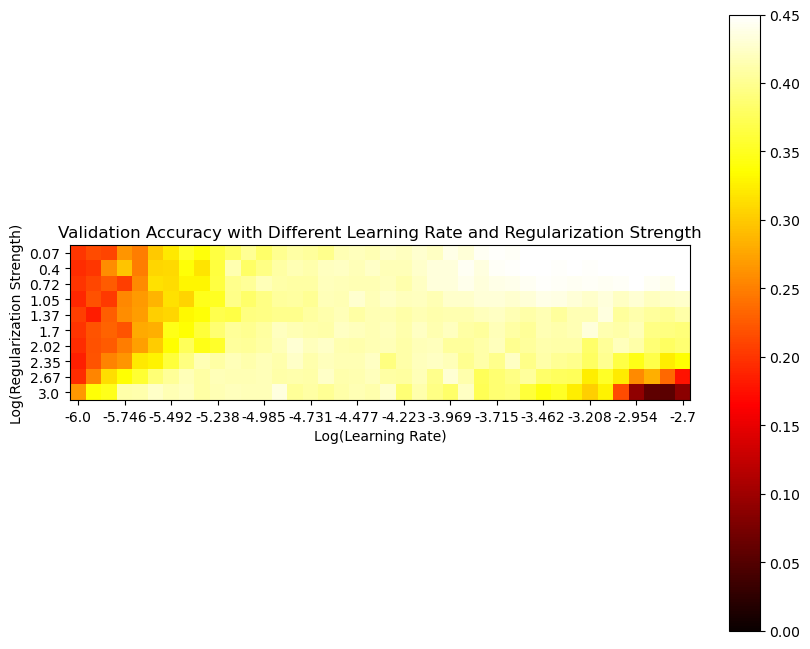

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_yticks(range(len(regularization_strengths)))
ax.set_yticklabels(np.round(np.log10(regularization_strengths), 2))
ax.set_xticks(range(0, len(learning_rates), 3))
ax.set_xticklabels(np.round(np.log10([learning_rates[i] for i in range(0, len(learning_rates), 3)]), 3))
im = ax.imshow(results_array, cmap=plt.cm.hot, vmin=0, vmax=0.45)
plt.colorbar(im)
plt.xlabel("Log(Learning Rate)")
plt.ylabel("Log(Regularization Strength)")
plt.title("Validation Accuracy with Different Learning Rate and Regularization Strength")
plt.show()

In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.466


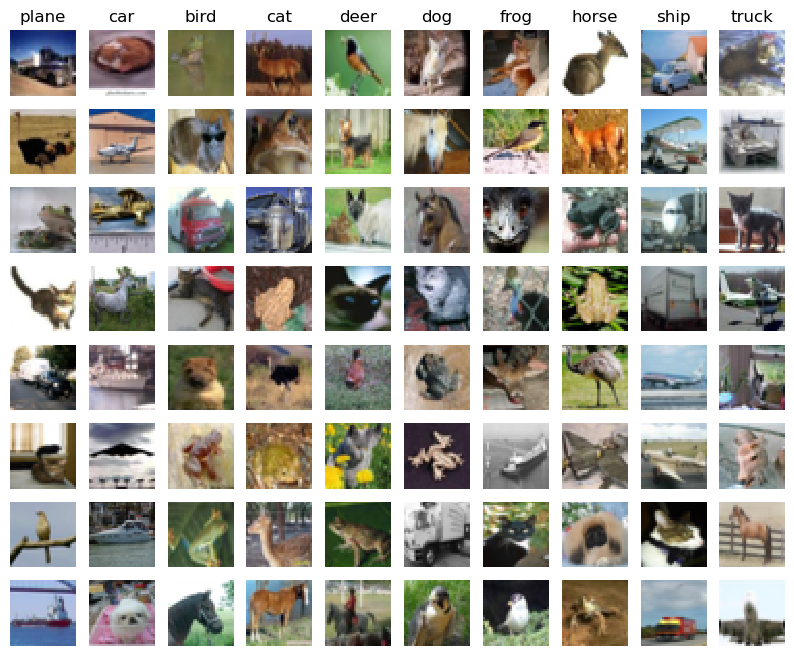

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
There are many trucks and ships in plane section and also some animals in the truck section.
Most of them make sense, cause the feature we are using is representing its edges and contour. If the main body have similar shape, it is easy to make a mistake.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
print(X_train_feats.shape)

(49000, 155)


In [9]:
def print_graph(lrs, rss, ra, hs, lrd):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_yticks(range(len(rss)))
    ax.set_yticklabels(np.round(np.log10(rss), 2))
    ax.set_xticks(range(0, len(lrs), 3))
    ax.set_xticklabels(np.round(np.log10([lrs[i] for i in range(0, len(lrs), 3)]), 3))
    im = ax.imshow(ra, cmap=plt.cm.hot)
    plt.colorbar(im)
    plt.xlabel("Log(Learning Rate)")
    plt.ylabel("Log(Regularization Strength)")
    plt.title("Validation Accuracy with Hidden Size = {} and Learning Rate Decay = {}".format(hs, lrd))
    plt.show()

def print_loss_history(loss, lrs, rss, factor):
    image_count = lrs.shape[0] // factor if lrs.shape[0] % factor == 0 else lrs.shape[0] // factor + 1
    fig, axs = plt.subplots(5, image_count // 5 if image_count % 5 == 0 else image_count // 5 + 1)
    count = 0
    for i in range(lrs.shape[0]):
        if i % factor == 0:
            axs[count%5, count//5].set_title("lr={:.3e}".format(lrs[i]))
            for j in range(rss.shape[0]):
                if j % factor == 0:
                    axs[count%5, count//5].plot(range(len(loss[(lrs[i], rss[j])])), loss[(lrs[i], rss[j])], label="rs={:.2e}".format(rss[j]))
            axs[count%5, count//5].legend(prop={'size': 4})
            count += 1
    plt.show()

def print_acc_history(ta, va, lrs, rss, factor):
    image_count = lrs.shape[0] // factor if lrs.shape[0] % factor == 0 else lrs.shape[0] // factor + 1
    fig, axs = plt.subplots(5, image_count // 5 if image_count % 5 == 0 else image_count // 5 + 1)
    count = 0
    for i in range(lrs.shape[0]):
        if i % factor == 0:
            axs[count%5, count//5].set_title("lr={:.3e}".format(lrs[i]))
            axs[count%5, count//5].plot(range(len(ta[lrs[i]])), ta[lrs[i]], 'b', label="train")
            axs[count%5, count//5].plot(range(len(va[lrs[i]])), va[lrs[i]], 'r', label="val")
            axs[count%5, count//5].legend(prop={'size': 4})
            count += 1
    plt.show()

Finish 1/4, time for this iter is 231.149540s
Current Best Validation Rate: 0.588000


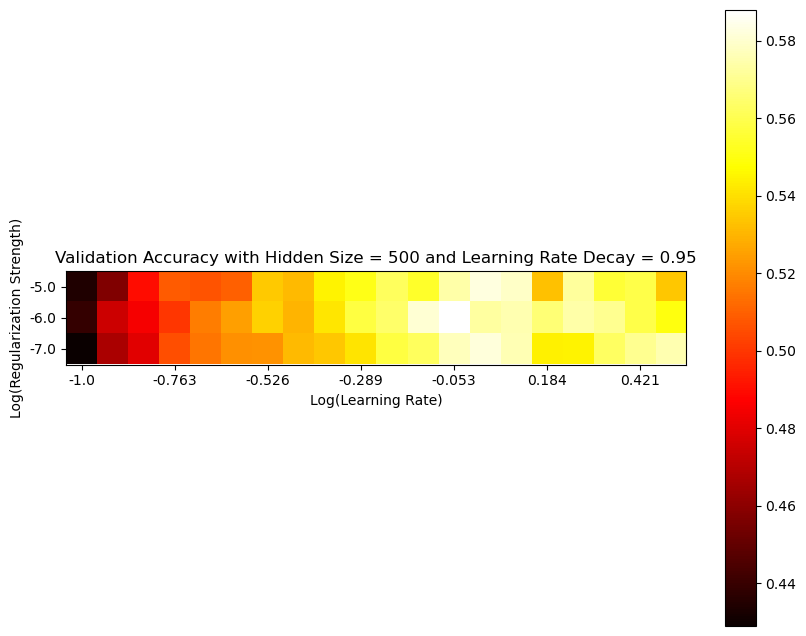

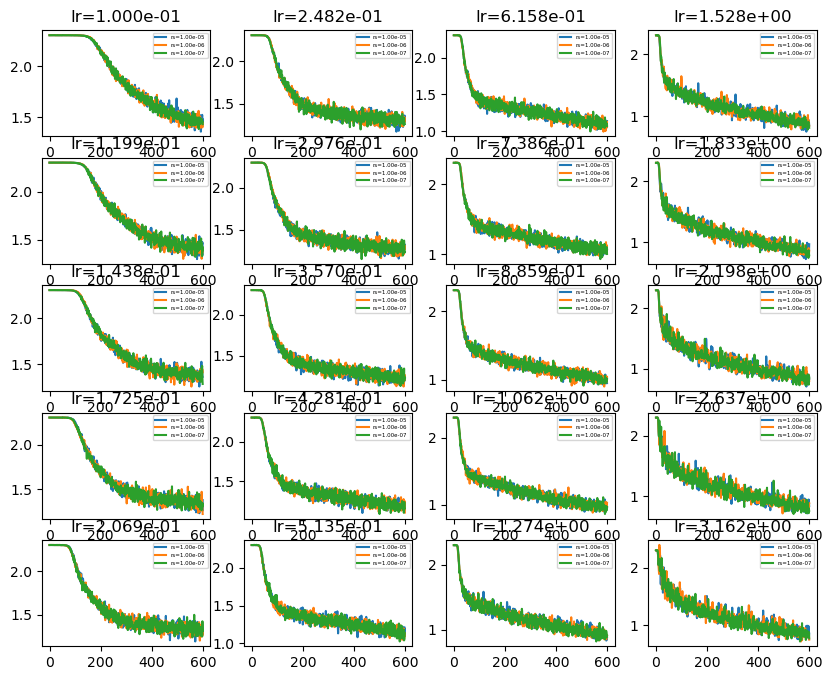

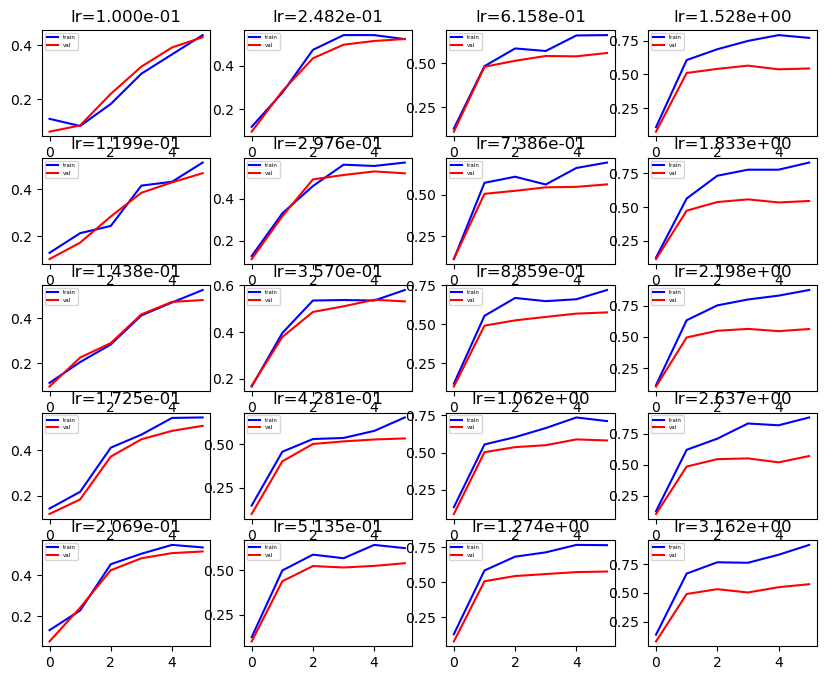

Finish 2/4, time for this iter is 228.904557s
Current Best Validation Rate: 0.602000


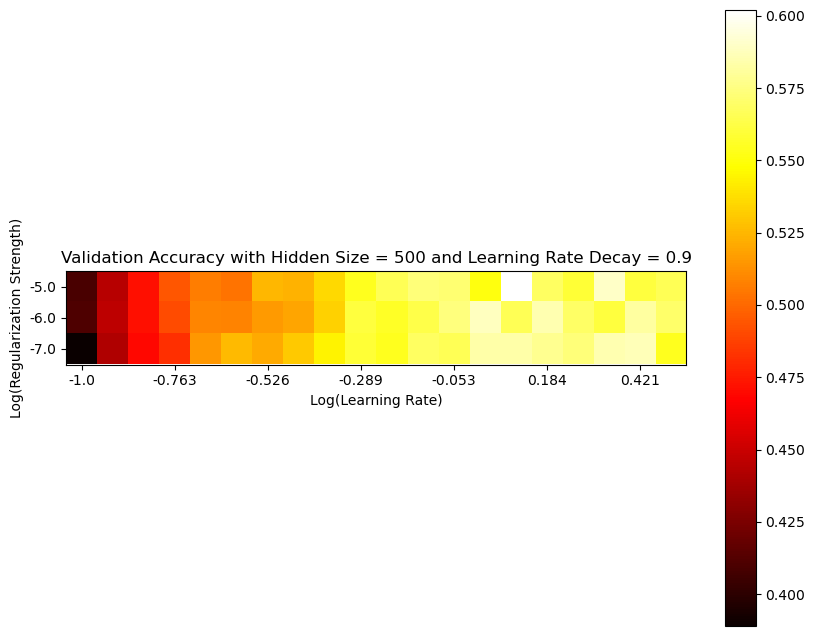

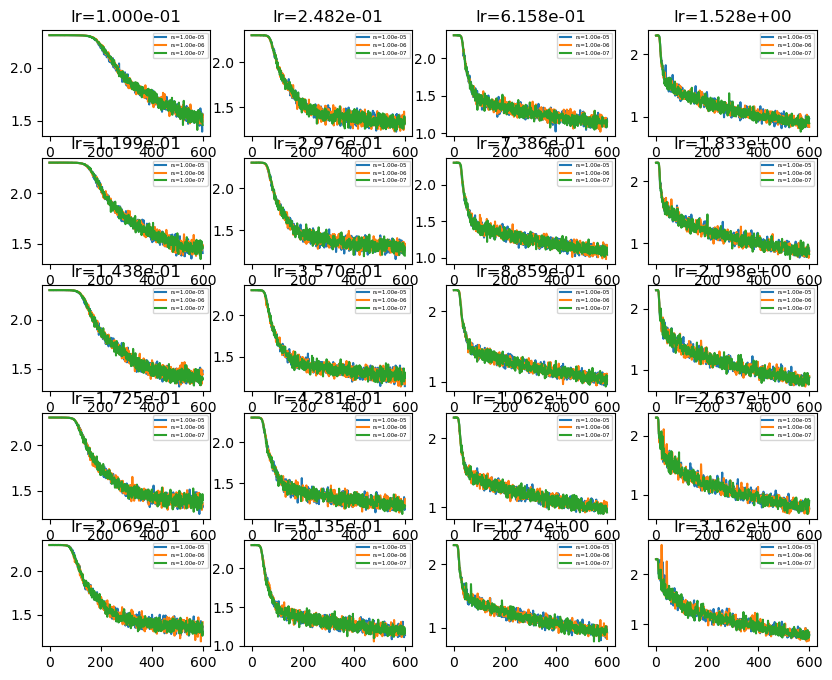

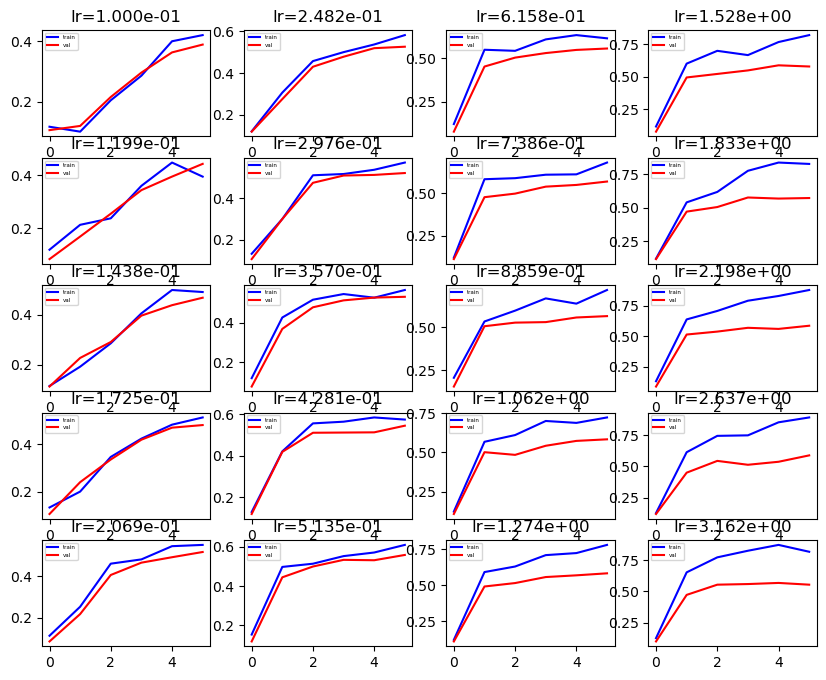

Finish 3/4, time for this iter is 228.375499s
Current Best Validation Rate: 0.609000


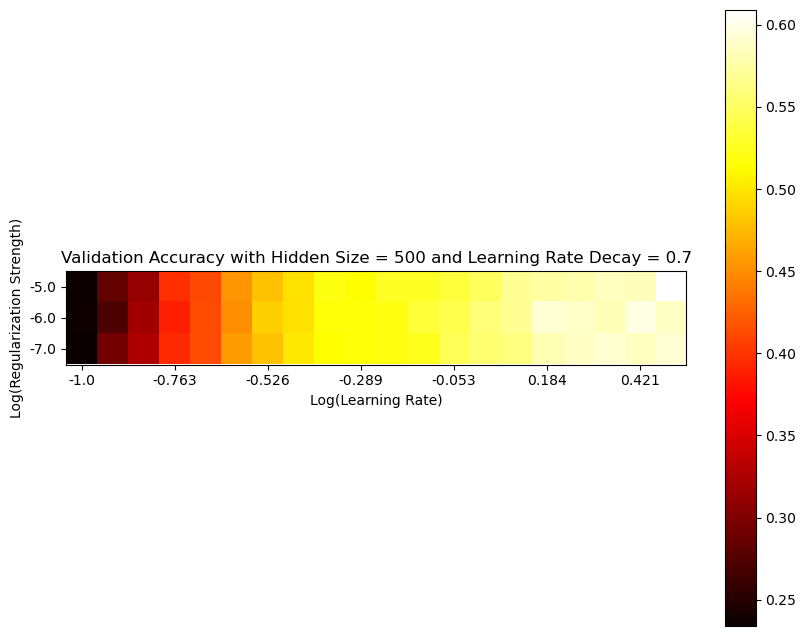

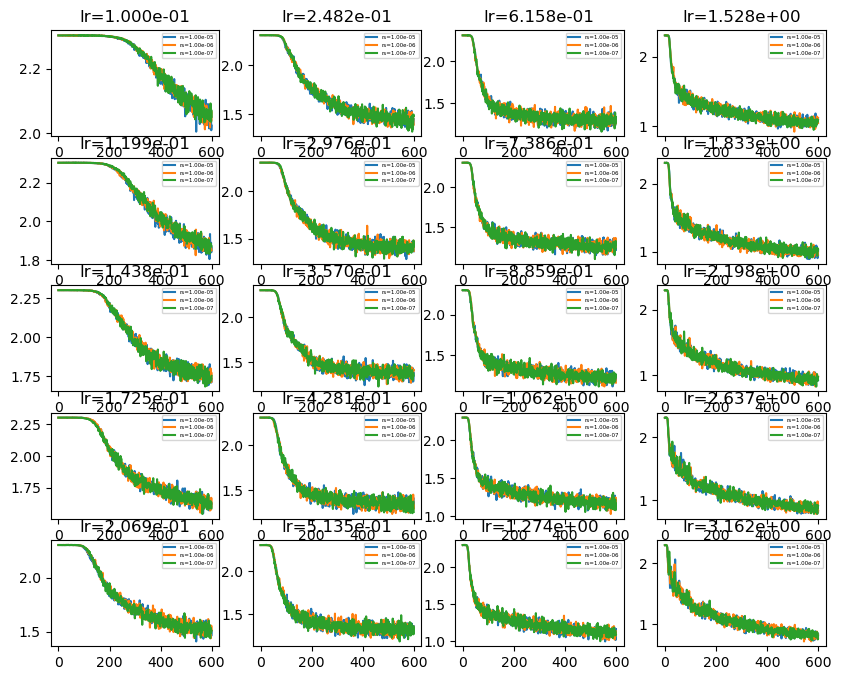

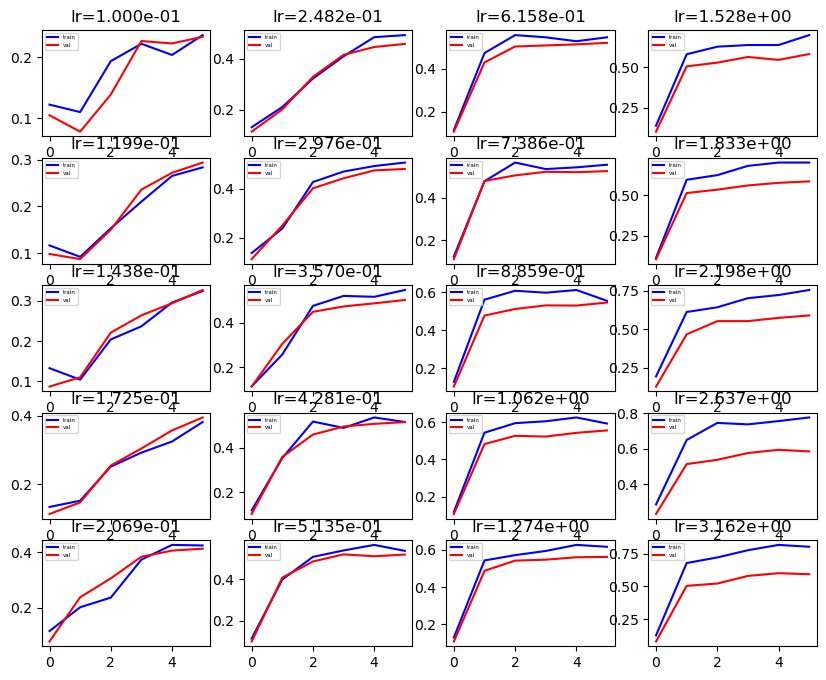

Finish 4/4, time for this iter is 228.467674s
Current Best Validation Rate: 0.609000


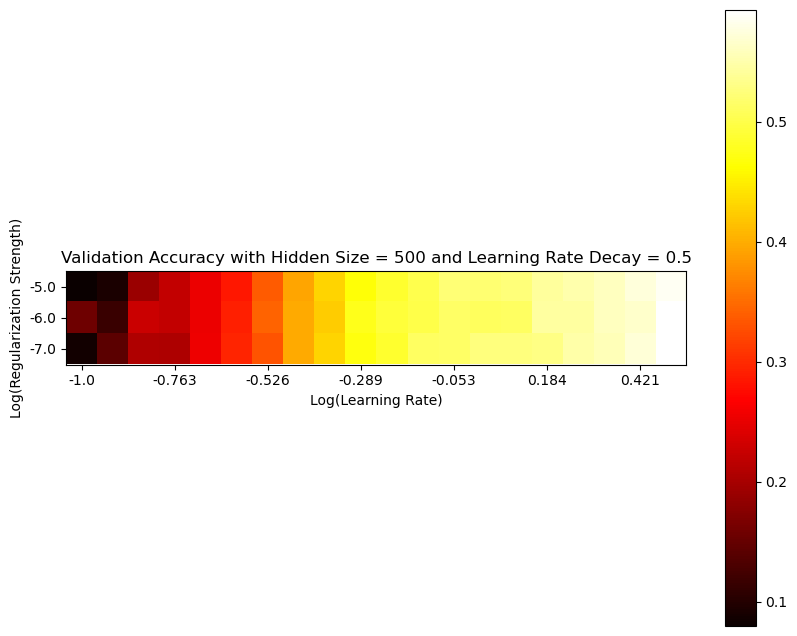

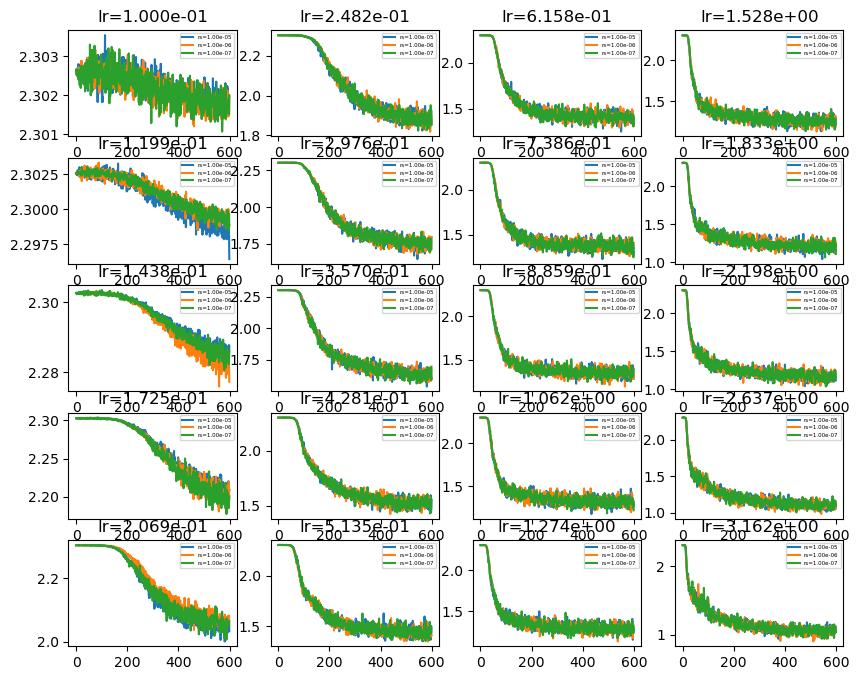

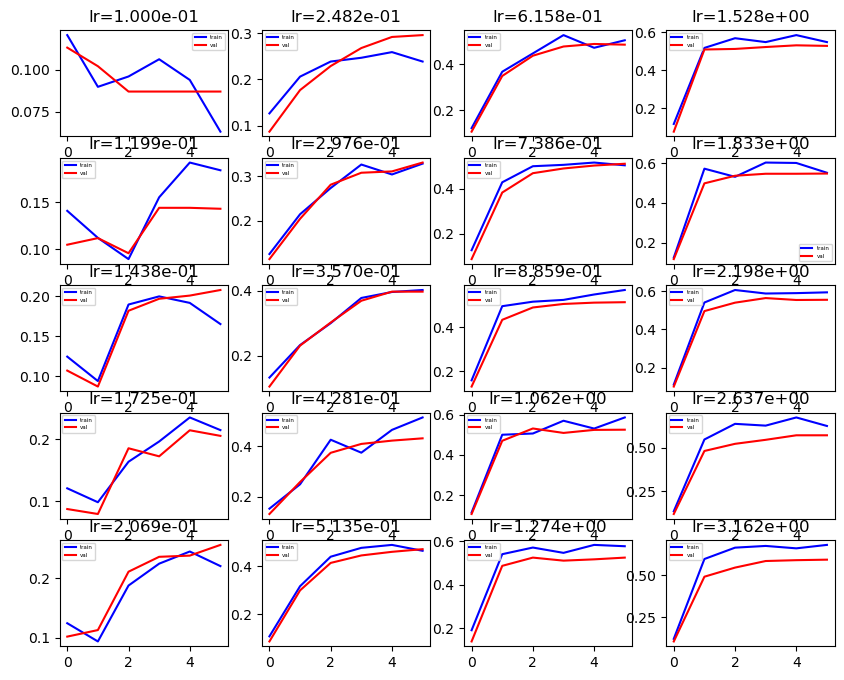

In [10]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None
best_val = 0

################################################################################
# Train a two-layer neural network on image features. You may want to          #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
count = 0
hidden_sizes = [500]
learning_rate_decays = [0.95, 0.9, 0.7, 0.5]
learning_rates = np.logspace(-1, 0.5, 20)
regularization_strengths = np.logspace(-5, -7, 3)
results_array = np.zeros((len(hidden_sizes), len(learning_rate_decays), regularization_strengths.shape[0], learning_rates.shape[0]))
loss_his = {}
train_acc_his = {}
val_acc_his = {}

for hs in range(len(hidden_sizes)):
    for lrd in range(len(learning_rate_decays)):
        tic = time.time()
        for lr in learning_rates:
            for rs in regularization_strengths:
                net_test = TwoLayerNet(input_dim, hidden_sizes[hs], num_classes)
                obj = net_test.train(X_train_feats, y_train, X_val_feats, y_val, batch_size=490,
                                     learning_rate=lr, reg=rs, learning_rate_decay=learning_rate_decays[lrd], num_iters=600)
                val_acc = obj['val_acc_history'][-1]
                loss_his[(lr, rs)] = obj['loss_history']
                if np.where(regularization_strengths == rs)[0] == len(regularization_strengths) - 1:
                    train_acc_his[lr] = obj['train_acc_history']
                    val_acc_his[lr] = obj['val_acc_history']
                results_array[hs, lrd, np.where(regularization_strengths == rs)[0], np.where(learning_rates == lr)[0]] = val_acc
                if best_val < val_acc:
                    best_val = val_acc
                    net = net_test
        count += 1
        toc = time.time()
        print("Finish %d/%d, time for this iter is %fs" % (count, len(hidden_sizes)*len(learning_rate_decays), toc-tic))
        print("Current Best Validation Rate: %f" % (best_val, ))
        print_graph(learning_rates, regularization_strengths, results_array[hs, lrd], hidden_sizes[hs], learning_rate_decays[lrd])
        print_loss_history(loss_his, learning_rates, regularization_strengths, 1)
        print_acc_history(train_acc_his, val_acc_his, learning_rates, regularization_strengths, 1)
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [11]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.598


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

I write three functions for **visualizing the training info**.
They will show:
- validation accuracy with respect to learning rate and regularization strength
- train loss with respect to iteration
- training validation accuracy with respect to echos

The code is shown below and you can check the hyperparameter tunning part for its usage.

In [ ]:
# validation accuracy in a 2D graph with respect to learning rate and regularization strength
def print_graph(lrs, rss, ra, hs, lrd):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_yticks(range(len(rss)))
    ax.set_yticklabels(np.round(np.log10(rss), 2))
    ax.set_xticks(range(0, len(lrs), 3))
    ax.set_xticklabels(np.round(np.log10([lrs[i] for i in range(0, len(lrs), 3)]), 3))
    im = ax.imshow(ra, cmap=plt.cm.hot)
    plt.colorbar(im)
    plt.xlabel("Log(Learning Rate)")
    plt.ylabel("Log(Regularization Strength)")
    plt.title("Validation Accuracy with Hidden Size = {} and Learning Rate Decay = {}".format(hs, lrd))
    plt.show()

# train loss with respect to iteration (one plot for one learning rate)
def print_loss_history(loss, lrs, rss, factor):
    image_count = lrs.shape[0] // factor if lrs.shape[0] % factor == 0 else lrs.shape[0] // factor + 1
    fig, axs = plt.subplots(5, image_count // 5 if image_count % 5 == 0 else image_count // 5 + 1)
    count = 0
    for i in range(lrs.shape[0]):
        if i % factor == 0:
            axs[count%5, count//5].set_title("lr={:.3e}".format(lrs[i]))
            for j in range(rss.shape[0]):
                if j % factor == 0:
                    axs[count%5, count//5].plot(range(len(loss[(lrs[i], rss[j])])), loss[(lrs[i], rss[j])], label="rs={:.2e}".format(rss[j]))
            axs[count%5, count//5].legend(prop={'size': 4})
            count += 1
    plt.show()

# training validation accuracy with respect to echos (showing both of them in the same plot to check if there's overfitting)
def print_acc_history(ta, va, lrs, rss, factor):
    image_count = lrs.shape[0] // factor if lrs.shape[0] % factor == 0 else lrs.shape[0] // factor + 1
    fig, axs = plt.subplots(5, image_count // 5 if image_count % 5 == 0 else image_count // 5 + 1)
    count = 0
    for i in range(lrs.shape[0]):
        if i % factor == 0:
            axs[count%5, count//5].set_title("lr={:.3e}".format(lrs[i]))
            axs[count%5, count//5].plot(range(len(ta[lrs[i]])), ta[lrs[i]], 'b', label="train")
            axs[count%5, count//5].plot(range(len(va[lrs[i]])), va[lrs[i]], 'r', label="val")
            axs[count%5, count//5].legend(prop={'size': 4})
            count += 1
    plt.show()